### Disclaimer
The following notes have the purpose to briefly describe notions and definitions used during the lectures. The notes should provide enough information to properly follow what explained during the course, but they do not represent a complete introduction to the subject.

# Simple linear regression and linear correlation coefficient

Suppose we observe $N$ data pairs. Call them $(x_i, y_i)$, for $i = 1, \dots, N$. Suppose we describe the underlying relationship between $y_i$ and $x_i$ as 

$$
y_i = \alpha + \beta \, x_i + \epsilon_i
$$

where $\epsilon_i$ is an error term. This relationship between the true (but unobserved) underlying parameters $\alpha$ and $\beta$ and the data points is called a linear regression model.



The goal is to find estimated values $\hat{\alpha}\; $ and 
$\hat{\beta}\; $ for the parameters $\alpha$ and $\beta$ 
which would provide the "best" linear fit for the data points. In simple linear regression, the "best" fit is understood as the line that minimizes the sum of squared residuals 

$$
Q = \sum_{i} \hat{\epsilon}_i \; ^2
$$

where

$$
\hat{\epsilon}_i \; ^2 =  (y_i - \alpha - \beta \, x_i)^2
$$

The solution to the minimization problem

$$
\min_{\alpha, \beta}  Q (\alpha, \beta)
$$


is given by

$$
\hat{\alpha} \;\; = \bar{y} \; - \hat{\beta} \;\; \bar{x}
$$

and

$$
\hat{\beta} \;\; = r \; \frac{s_y}{s_x}
$$

where 

$$
\bar{x} = \frac{1}{N} \sum_i x_i \qquad  s_x = \sqrt{\frac{1}{N} \, \sum_i (x_i - \bar{x})^2}
$$

$$
\bar{y} = \frac{1}{N} \sum_i y_i \qquad  s_y = \sqrt{\frac{1}{N} \, \sum_i (y_i - \bar{y})^2}
$$

are average value and standard deviation of the samples, and

$$
r = \frac{\bar{xy} - \bar{x} \bar{y}}{ \sqrt{ (\bar{x^2} - \bar{x}^2) (\bar{y^2} - \bar{y}^2) } }
$$

is the (Pearson's) linear correlation coefficient. The definition of $r$ is such that $-1 \leq r \leq 1$. Note that 

$$
\bar{x^2} = \frac{1}{N} \sum_i x_i^2  \qquad  \bar{y^2} = \frac{1}{N} \sum_i y_i^2
$$
are the second moments of the samples.

## Libraries used in the notebook

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 
import random
import numpy as np
from scipy import stats

## Python implementation

In [30]:
def average_value (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


def std_deviation (x):
    av_x = average_value (x)
    if av_x != None:
        std = 0.0
        num = 0.0
        for i in range(0, len(x)):
            std += (float(x[i]) - av_x)*(float(x[i]) - av_x)
            num += 1.0
        return np.sqrt(std/num)
    return None


def second_moment (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])*float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


def linear_regression (x, y):
    
    if (len(x) != len(y)):
        return None
    
    a_x =  average_value (x)
    a_y =  average_value (y)
    s_x =  std_deviation (x)
    s_y =  std_deviation (y)
    m_x =  second_moment (x)
    m_y =  second_moment (y)
    
    
    p = []
    for i in range(0, len(x)):
        p.append(float(x[i])*float(y[i]))
    a_p = average_value (p)
    
    ##linear correlation coefficient
    r = (a_p - a_x*a_y) / np.sqrt ( (m_x-a_x*a_x) * (m_y-a_y*a_y) )
    
    
    ##best fit
    beta = r * s_y / s_x
    alpha = a_y - beta * a_x
    
    
    return alpha, beta, r

### Create synthetic data

Generate linearly related data plus some noise.

In [31]:
def synthetic_data (alpha, beta, noise_level, N):
    
    e = np.random.normal(loc=0.0, scale=noise_level, size=N)
    x = np.linspace(-1.0, 1.0, num=N)
    y = np.zeros(N)
    for i in range(0, len(x)):
        y[i] = alpha + beta * x[i] + e[i]
        
    return x, y    

In [38]:
t_alpha = 1.0
t_beta = -1.0
noise_level = 0.5
N = 100

x, y = synthetic_data (t_alpha, t_beta, noise_level, N)

In [39]:
alpha, beta, r = linear_regression (x, y)
print ('alpha : ', alpha)
print ('beta : ', beta)
print ('correlation coefficient : ', r)

alpha :  0.917360039647
beta :  -0.97085370864
correlation coefficient :  -0.716973358134


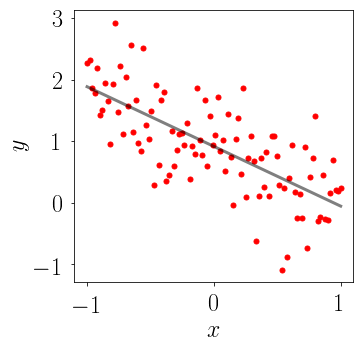

In [40]:
plt.figure(figsize=(5,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8




plt.plot(x,y, marker='o', color ='r', markersize=5, linewidth=0)

best_fit_x = np.arange(min(x), max(x), (max(x)- min(x)) / 10000.0)
best_fit_y = alpha + beta * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='k', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)


plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

## Linear regression with scipy

Linear correlation is implemented in many Python libraries. For example in
[scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html)

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)

alpha :  1.02033566085
beta :  1.04391114837
correlation coefficient :  0.490307660053


## Analysis of winning times in 100 meters at the Olympics

The following replicates the linear regression of historical data as performed in

Atkinson M, Hay SI, Stephens P, Hunter C, Bignell G (2004) [Momentous sprint at the 2156 Olympics?](https://www.nature.com/articles/431525a)
Nature 431: 525–526.


In [24]:
def read_data (filein):
    year = []
    gold = []
    world_record = 0.0

    with open(filein) as f:
        for line in f:
            if not line.startswith("#"):
                if int(line.strip().split(' ')[0]) < 2016 and int(line.strip().split(' ')[0]) > 1900:
                    data = line.strip()
                    data_col = data.split(' ')
                    year.append(int(data_col[0]))
                    gold.append(float(data_col[1]))
            else:
                world_record = float(line.strip()[1:])
                
    return year, gold

In [25]:
filein = 'Data/mens-100-metres.dat'
year_m, gold_m = read_data (filein)

filein = 'Data/womens-100-metres.dat'
year_w, gold_w = read_data (filein)

In [26]:
#M
print ('Results for M:')
slope_m, intercept_m, r_value_m, p_value_m, std_err_m = stats.linregress(year_m,gold_m)
print ('alpha : ', intercept_m)
print ('beta : ', slope_m)
print ('correlation coefficient : ', r_value_m)

#W
print ('Results for W:')
slope_w, intercept_w, r_value_w, p_value_w, std_err_w = stats.linregress(year_w,gold_w)
print ('alpha : ', intercept_w)
print ('beta : ', slope_w)
print ('correlation coefficient : ', r_value_w)

Results for M:
alpha :  32.4654305143
beta :  -0.0113151877215
correlation coefficient :  -0.925220621525
Results for W:
alpha :  43.2000437468
beta :  -0.0161927431806
correlation coefficient :  -0.85759700334


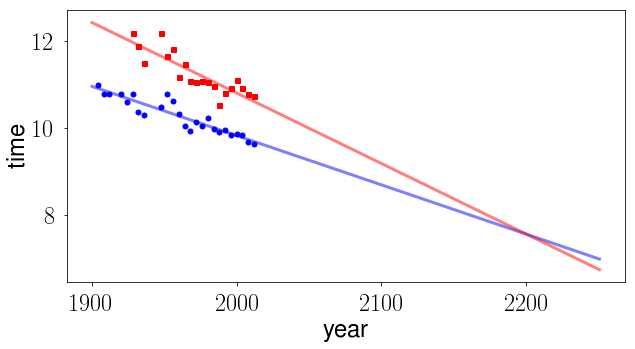

In [28]:
plt.figure(figsize=(10,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



#M
plt.plot(year_m,gold_m, marker='o', color ='blue', markersize=5, linewidth=0)
best_fit_x = np.arange(1900, (2252- 1900 / 10000.0))
best_fit_y = intercept_m + slope_m * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='blue', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)

                       
#W
plt.plot(year_w,gold_w, marker='s', color ='red', markersize=5, linewidth=0)
best_fit_x = np.arange(1900, (2252- 1900 / 10000.0))
best_fit_y = intercept_w + slope_w * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='red', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)



plt.ylabel('time')
plt.xlabel('year')

plt.show()